# Assignment 2 - Josephine Tan

# Question 1

In [121]:
#Import packages
import pandas as pd

I chose to open the two datasets with the following labels. I labelled the variables of weight and total income from 
the SurveyIncome dataset differently from the BestIncome dataset to differentiate between these two variables which are from two datasets.

In [122]:
BestIncome = pd.read_csv('BestIncome.txt', names=['labor income', 'capital income', 'height', 'weight'])
BestIncome.describe()

,labor income,capital income,height,weight
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,57052.925133,9985.798563,65.014021,150.006011
std,8036.544363,2010.123691,1.999692,9.973001
min,22917.607900,1495.191896,58.176154,114.510700
25%,51624.339880,8611.756679,63.652971,143.341979
50%,56968.709935,9969.840117,65.003557,149.947641
75%,62408.232277,11339.905773,66.356915,156.724586
max,90059.898537,19882.320069,72.802277,185.408280


In [123]:
SurveyIncome = pd.read_csv('SurvIncome.txt', names=['total_income1', 'weight1', 'age', 'female'])
SurveyIncome.describe()

,total_income1,weight1,age,female
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,64871.210860,149.542181,44.839320,0.50000
std,9542.444214,22.028883,5.939185,0.50025
min,31816.281649,99.662468,25.741333,0.00000
25%,58349.862384,130.179235,41.025231,0.00000
50%,65281.271149,149.758434,44.955981,0.50000
75%,71749.038000,170.147337,48.817644,1.00000
max,92556.135462,196.503274,66.534646,1.00000


#### (a) I will use a linear regression twice to derive the coefficients of the following equations from the SurveyIncome dataset:

Equations I will use: 
age = B0 + total income1B1 + weight1B2 and female = BO + total income1B1 + weight1B2

In [124]:
#For the linear regression for age:
outcome = 'age'
features = ['total_income1', 'weight1']
x, y = SurveyIncome[features], SurveyIncome[outcome] 

In [125]:
#Testing if the X and Y variables are correct:
x.head()

,total_income1,weight1
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [126]:
y.head()

0    46.610021
1    48.791349
2    48.429894
3    41.543926
4    41.201245
Name: age, dtype: float64

In [127]:
#Running the linear regression for age
import statsmodels.api as sm

x = sm.add_constant(x, prepend=False)
x.head()

m = sm.OLS(y, x)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.531
Time:                        20:10:45   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
total_income1   2.52e-05   2.26e-05      1.114

In [128]:
#Saving prediction of model for age
ols_df = pd.concat([y, x], axis=1)
ols_df.head()

,age,total_income1,weight1,const
0,46.610021,63642.513655,134.998269,1.0
1,48.791349,49177.380692,134.392957,1.0
2,48.429894,67833.339128,126.482992,1.0
3,41.543926,62962.266217,128.038121,1.0
4,41.201245,58716.952597,126.211980,1.0


In [129]:
#Adding model prediction of age to the SurveyIncome dataset
ols_df['age_pred'] = res.predict(x)
ols_df.head()

,age,total_income1,weight1,const,age_pred
0,46.610021,63642.513655,134.998269,1.0,44.906121
1,48.791349,49177.380692,134.392957,1.0,44.545636
2,48.429894,67833.339128,126.482992,1.0,45.068980
3,41.543926,62962.266217,128.038121,1.0,44.935764
4,41.201245,58716.952597,126.211980,1.0,44.841048


In [130]:
#Running linear regression on gender (female) as gender 
outcome = 'female'
features = ['total_income1', 'weight1']
X, y = SurveyIncome[features], SurveyIncome[outcome] 

import statsmodels.api as sm

X = sm.add_constant(X, prepend=False)
X.head()

m = sm.OLS(y, X)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 female   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2513.
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:10:50   Log-Likelihood:                 173.49
No. Observations:                1000   AIC:                            -341.0
Df Residuals:                     997   BIC:                            -326.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
total_income1  -5.25e-06   7.76e-07     -6.765

In [131]:
#Saving prediction of model for gender
ols_df = pd.concat([y, x], axis=1)
ols_df.head()

,female,total_income1,weight1,const
0,1.0,63642.513655,134.998269,1.0
1,1.0,49177.380692,134.392957,1.0
2,1.0,67833.339128,126.482992,1.0
3,1.0,62962.266217,128.038121,1.0
4,1.0,58716.952597,126.211980,1.0


In [132]:
#Adding model prediction for gender to the SurveyIncome dataset
ols_df['gender_pred'] = res.predict(x)
ols_df.head()

,female,total_income1,weight1,const,gender_pred
0,1.0,63642.513655,134.998269,1.0,0.790496
1,1.0,49177.380692,134.392957,1.0,0.878254
2,1.0,67833.339128,126.482992,1.0,0.934802
3,1.0,62962.266217,128.038121,1.0,0.930001
4,1.0,58716.952597,126.211980,1.0,0.987952


#### (b) Imputing the variables into the BestIncome dataset

In [133]:
#For us to estimate age and gender (female) on the BestIncome dataset, and use the following equations from SurveyIncome,

#age = B0 + total incomeB1 + weightB2 
#female = BO + total incomeB1 + weightB2 

#We need to add labor income and capital income to equate to total income in the BestIncome dataset.
BestIncome['total_income'] = BestIncome['labor income'] + BestIncome['capital income']
BestIncome.head()

,labor income,capital income,height,weight,total_income
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612


In [134]:
#Adding the equation of predicted age (age_pred) from the SurveyIncome dataset to the BestIncome dataset
def age_pred(row):
    
    total_income = row[0]
    weight = row[1]
    
    age_pred = 44.2097+(total_income*-2.52e-05)+(weight*-0.0067)
    return age_pred
age_pred([63642.513655, 134.998269])

41.701420253594

In [135]:
#Adding the imputed age variable (imputed_age) into the BestIncome dataset
BestIncome['imputed_age'] = BestIncome[['total_income', 'weight']].apply(age_pred, axis=1) 
BestIncome.head()

,labor income,capital income,height,weight,total_income,imputed_age
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,41.624367
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,41.123862
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,41.630167
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,41.500853
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,41.818180


In [136]:
#Adding the equation of female (gender_pred) from the SurveyIncome dataset to the BestIncome dataset
def gender_pred(row):
    
    total_income = row[0]
    weight = row[1]
    
    gender_pred = 3.7611+(total_income*-5.25e-06)+(weight*-0.0195)
    if gender_pred < 0.5:
        return 0
    elif gender_pred >= 0.5:
        return 1

gender_pred([63642.513655, 134.998269])


1

In [137]:
BestIncome['imputed_gender_pred'] = BestIncome[['total_income', 'weight']].apply(gender_pred, axis=1)
BestIncome.head()

,labor income,capital income,height,weight,total_income,imputed_age,imputed_gender_pred
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,41.624367,0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,41.123862,0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,41.630167,0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,41.500853,0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,41.818180,0


#### (c) Descriptive Statistics of age and gender

In [138]:
BestIncome['imputed_age'].describe()

count    10000.000000
mean        41.515284
std          0.219817
min         40.683056
25%         41.365293
50%         41.515710
75%         41.664056
max         42.373440
Name: imputed_age, dtype: float64

The mean is 41.52, standard deviation is 0.22, maximum is 42.37, minimum is 40.68, number of observations is 10,000.

In [139]:
BestIncome['imputed_gender_pred'].describe()

count    10000.000000
mean         0.470500
std          0.499154
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: imputed_gender_pred, dtype: float64

The mean is 0.47, standard deviation is 0.50, maximum is 1.00, minimum is 0.00, number of observations is 10,000.

#### (d) Correlation Matrix

In [140]:
#In matrix form
BestIncome = BestIncome.drop(columns = ["total_income"])

corr = BestIncome.corr()
corr.style.background_gradient()

,labor income,capital income,height,weight,imputed_age,imputed_gender_pred
labor income,1,0.0053253,0.00278978,0.00450691,-0.923915,-0.164857
capital income,0.0053253,1,0.0215716,0.00629868,-0.237264,-0.0465937
height,0.00278978,0.0215716,1,0.172103,-0.0598565,-0.134172
weight,0.00450691,0.00629868,0.172103,1,-0.30958,-0.778537
imputed_age,-0.923915,-0.237264,-0.0598565,-0.30958,1,0.39928
imputed_gender_pred,-0.164857,-0.0465937,-0.134172,-0.778537,0.39928,1


# Question 2

In [141]:
#Opening dataset
IncomeIntel = pd.read_csv('IncomeIntel1.txt', names=['grad_year', 'gre_qnt', 'salary'])
IncomeIntel.head()

,grad_year,gre_qnt,salary
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


#### (a) Obtaining the coefficients of the regression of Salary on GRE quantitative scores

In [142]:
#Linear regression on Salary on GRE quantitative scores
outcome  = 'salary'
features = ['gre_qnt']

X, y = IncomeIntel[features], IncomeIntel[outcome]

import statsmodels.api as sm

X = sm.add_constant(X, prepend=False)
X.head()

m = sm.OLS(y, X)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        20:11:43   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

The coefficient for GRE quantitative score is -25.76 and the constant is 8.95e+04, and the standard error is 1.37.

#### (b) Scatter plot of graduation year and GRE quantitative score

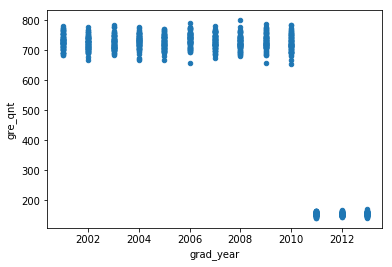

In [143]:
#Running a simple scatter plot of the graduation year and GRE quantitative scores
import matplotlib.pyplot as plt
grad_year = IncomeIntel['grad_year']
gre_qnt = IncomeIntel['gre_qnt']
IncomeIntel.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

As seen in the scatter plot, the three variables in 2011, 2012 and 2013 have a very low GRE quantitative score of 200, while the rest of the GRE scores are around 800. This drop in GRE scores are because the GRE tests have changed in testing format since 2011. As such, we cannot compare GRE scores for 2011 and after 2011 based on absolute numbers alone. One solution is to change all the GRE scores to Z-scores (as these scores have not changed over the years), for us to compare between all the years.

In [144]:
#Implementing solution proposed above
df = IncomeIntel.copy() 
gre2 = df.groupby('grad_year').transform(lambda x : (x - x.mean()) / x.std())  # transform 
gre2.head()
IncomeIntel['zscore'] = gre2['gre_qnt'] 
IncomeIntel.head

<bound method NDFrame.head of      grad_year     gre_qnt         salary    zscore
0       2001.0  739.737072   67400.475185  0.406740
1       2001.0  721.811673   67600.584142 -0.356635
2       2001.0  736.277908   58704.880589  0.259427
3       2001.0  770.498485   64707.290345  1.716750
4       2001.0  735.002861   51737.324165  0.205128
5       2001.0  763.876037   64010.822579  1.434726
6       2001.0  738.758659   60080.107481  0.365073
7       2001.0  706.407471   56263.309815 -1.012641
8       2001.0  705.886037   62109.859243 -1.034847
9       2001.0  700.971986   50189.704747 -1.244117
10      2001.0  709.754522   58721.753127 -0.870103
11      2001.0  734.854582   65380.594586  0.198813
12      2001.0  753.384151   52857.212365  0.987916
13      2001.0  690.312090   63572.217765 -1.698081
14      2001.0  774.154371   65892.177035  1.872441
15      2001.0  726.377225   67454.545201 -0.162205
16      2001.0  702.735945   59346.670232 -1.168997
17      2001.0  723.806542   70031

#### (c) Scatter plot of income and graduation year

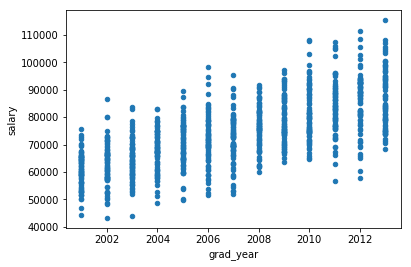

In [145]:
#Running a simple scatter plot on the graduation year and GRE quantitative scores
grad_year = IncomeIntel['grad_year']
salary = IncomeIntel['salary']
IncomeIntel.plot(x='grad_year', y='salary', kind='scatter')
plt.show()

As the data spans over time, and time increases constantly, we need to stationarize the data and control for time for us to complete the regression. Because these data are not panel data, I cannot use differencing or log differencing methods to detrend them. Instead, I plan to use growth rate to stationarize the data.

In [146]:
#Implementing solution proposed above
#To calculate the average growth rate in salary, 
avg_inc_by_year = IncomeIntel['salary'].groupby(IncomeIntel['grad_year']).mean().values

In [147]:
#To calculate the average growth rate in salaries across all 13 years,
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()

In [148]:
#Divide each salary by the growth rate
IncomeIntel['adj_salary'] = IncomeIntel['salary'] / (1 + avg_growth_rate)**(IncomeIntel['grad_year'] - 2001)

#### (d) Reestimating the coefficients with updated variables 

In [149]:
#Linear regression on revised Salary on revised GRE quantitative scores (Z scores)
outcome  = 'adj_salary'
features = ['zscore']

X, y = IncomeIntel[features], IncomeIntel[outcome]

import statsmodels.api as sm

X = sm.add_constant(X, prepend=False)
X.head()

m = sm.OLS(y, X)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             adj_salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4395
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.508
Time:                        20:12:11   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
zscore      -150.6097    227.193     -0.663      0.5

The estimated coefficients for Z score (for GRE quantitative score) is -150.61 and the constant is now 6.142e+04. The new estimated coefficients for zscore on revised salary is much higher than before and is no longer significant (P>0.05) as compared to the regression ran between the unrevised GRE scores and unrevised salary data. This means that after accounting for the test format changes in the GRE, and time drift in the salary data, there is no longer a significant relationship between these two variables. Thus the hypothesis that that higher intelligence, as operationalized as quantitative GRE scores, is associated with higher salary, is not supported. 